# Multiple Linear Regression
## Car Pricing Case Study

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. 

The company wants to know:

1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car
 

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
#reading the csv
car_pricing = pd.read_csv('CarPrice_Assignment.csv')

In [5]:
# Check the head of the dataset
car_pricing.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspect the various aspects of the housing dataframe

In [6]:
car_pricing.shape

(205, 26)

In [7]:
car_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [8]:
car_pricing.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
#checking null values
print(100*car_pricing.isnull().sum()/len(car_pricing))

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64


In [10]:
#checking unique values
car_pricing.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [11]:
#dropping id as its just row numbers
car_pricing=car_pricing.drop(["car_ID"],axis=1)
car_pricing.shape

(205, 25)

In [12]:
car_pricing['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [13]:
#splitting the car name by space and keeping only till first space
car_pricing['CarName'] = car_pricing.CarName.apply(lambda x: x.split( )[0])
car_pricing['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
car_pricing['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [15]:
# Correcting the spelling of car company names.
car_pricing['CarName'].replace('maxda','mazda',inplace=True)
car_pricing['CarName'].replace('Nissan','nissan',inplace=True) # for lower case
car_pricing['CarName'].replace('porcshce','porsche',inplace=True)
car_pricing['CarName'].replace('toyouta','toyota',inplace=True)
car_pricing['CarName'].replace(['vokswagen','vw'],'volkswagen',inplace=True)
car_pricing['CarName'].replace('alfa-romero','alfa-romeo',inplace=True)

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

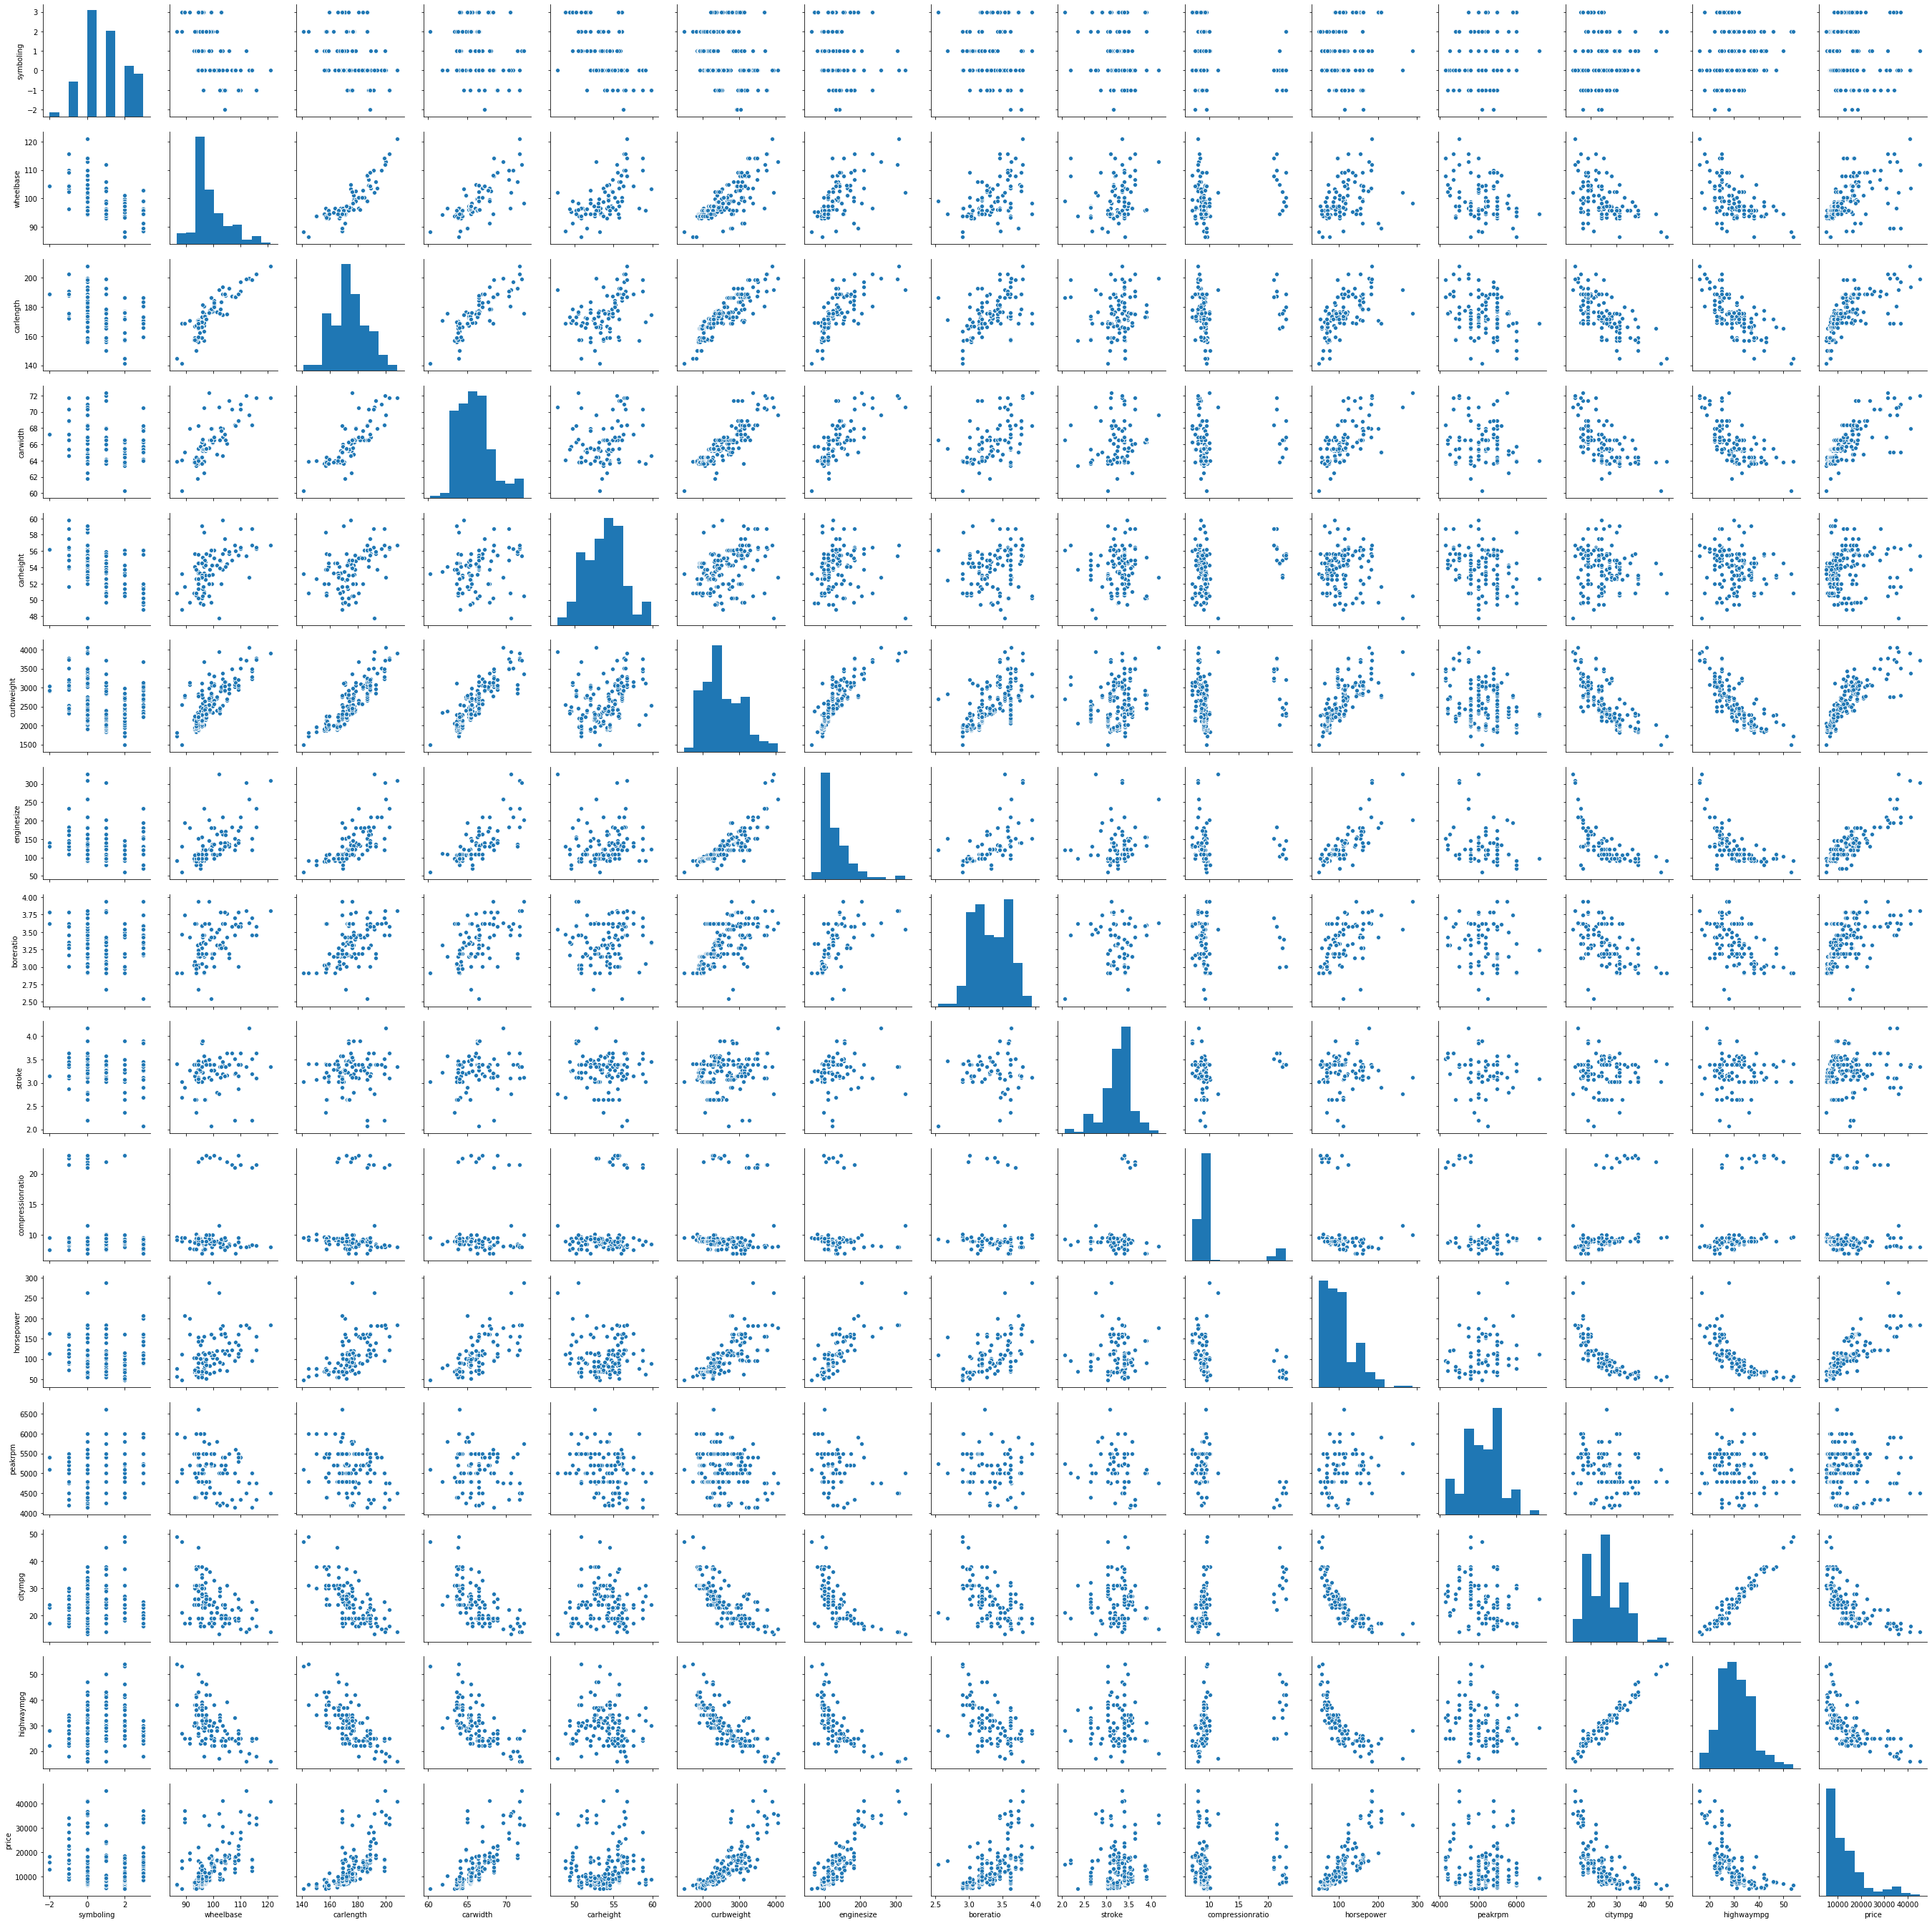

In [17]:
sns.pairplot(car_pricing)
plt.show()

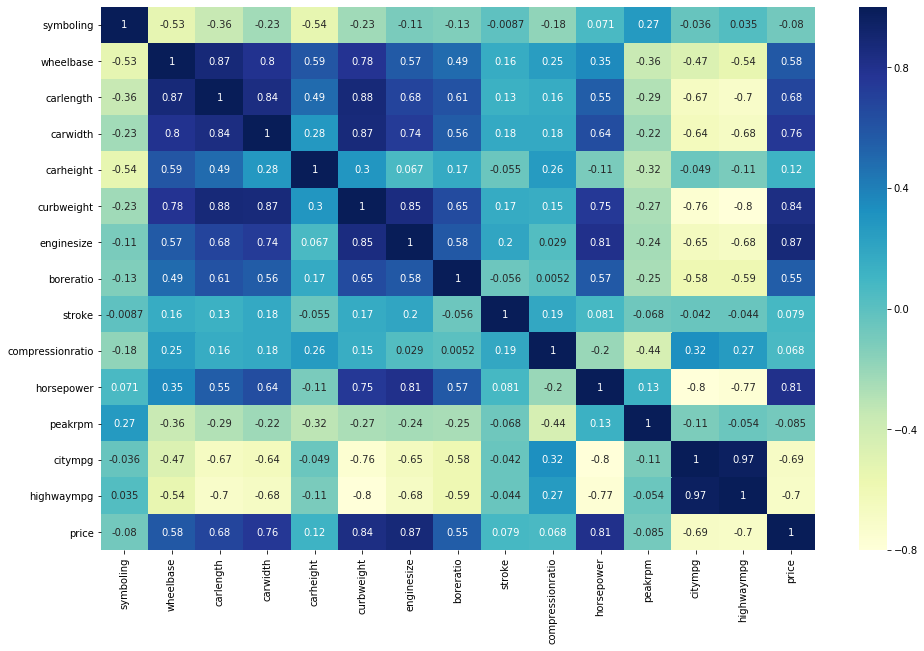

In [18]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(car_pricing.corr(), annot = True, cmap="YlGnBu")

# fix for mpl bug that cuts off top/bottom of seaborn
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

In [19]:
#converting symboling integer to various risk categpries
car_pricing['symboling'] = car_pricing['symboling'].map({-2: 'Low Risk',-1: 'Low Risk',0: 'Medium Risk',1: 'Medium Risk',2: 'High Risk',3:'High Risk'})

In [20]:
#dropping columns which have high co-relation between them 
car_pricing=car_pricing.drop(['highwaympg','carwidth','curbweight'],axis=1)
car_pricing.shape

(205, 22)

In [21]:
car_pricing.groupby('CarName').price.mean().sort_values(ascending=False)

CarName
jaguar        34600.000000
buick         33647.000000
porsche       31400.500000
bmw           26118.750000
volvo         18063.181818
audi          17859.166714
mercury       16503.000000
alfa-romeo    15498.333333
peugeot       15489.090909
saab          15223.333333
mazda         10652.882353
nissan        10415.666667
volkswagen    10077.500000
toyota         9885.812500
renault        9595.000000
mitsubishi     9239.769231
isuzu          8916.500000
subaru         8541.250000
honda          8184.692308
plymouth       7963.428571
dodge          7875.444444
chevrolet      6007.000000
Name: price, dtype: float64

In [22]:
#Dividing Car Company in various segments
CarCompany_Segment_Dict = {
    'chevrolet' : 'low_range',
    'dodge' : 'low_range',
    'plymouth' : 'low_range',
    'honda' : 'low_range',
    'subaru' : 'low_range',
    'isuzu' : 'low_range',
    'mitsubishi' : 'low_range',
    'renault' : 'low_range',
    'toyota' : 'low_range',
    'volkswagen' : 'mid_range',
    'nissan' : 'mid_range',
    'mazda' : 'mid_range',
    'saab' : 'mid_range',
    'peugeot' : 'mid_range',
    'alfa-romeo' : 'mid_range',
    'mercury' : 'mid_range',
    'audi' : 'mid_range',
    'volvo' : 'mid_range',
    'bmw' : 'high_range',
    'buick' : 'high_range',
    'porsche' : 'high_range',
    'jaguar' : 'high_range',
    }
car_pricing['CarCompany_Segment'] = car_pricing['CarName'].map(CarCompany_Segment_Dict)

# Dropping the orignal car_company variable
car_pricing.drop('CarName', axis=1, inplace=True)
car_pricing.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,CarCompany_Segment
0,High Risk,gas,std,two,convertible,rwd,front,88.6,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0,mid_range
1,High Risk,gas,std,two,convertible,rwd,front,88.6,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0,mid_range
2,Medium Risk,gas,std,two,hatchback,rwd,front,94.5,171.2,52.4,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0,mid_range
3,High Risk,gas,std,four,sedan,fwd,front,99.8,176.6,54.3,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0,mid_range
4,High Risk,gas,std,four,sedan,4wd,front,99.4,176.6,54.3,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0,mid_range


#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for  these variables.

In [23]:
# List of Categorical Variables
categorical_variables = list(car_pricing.columns[car_pricing.dtypes == 'object'])
categorical_variables

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'CarCompany_Segment']

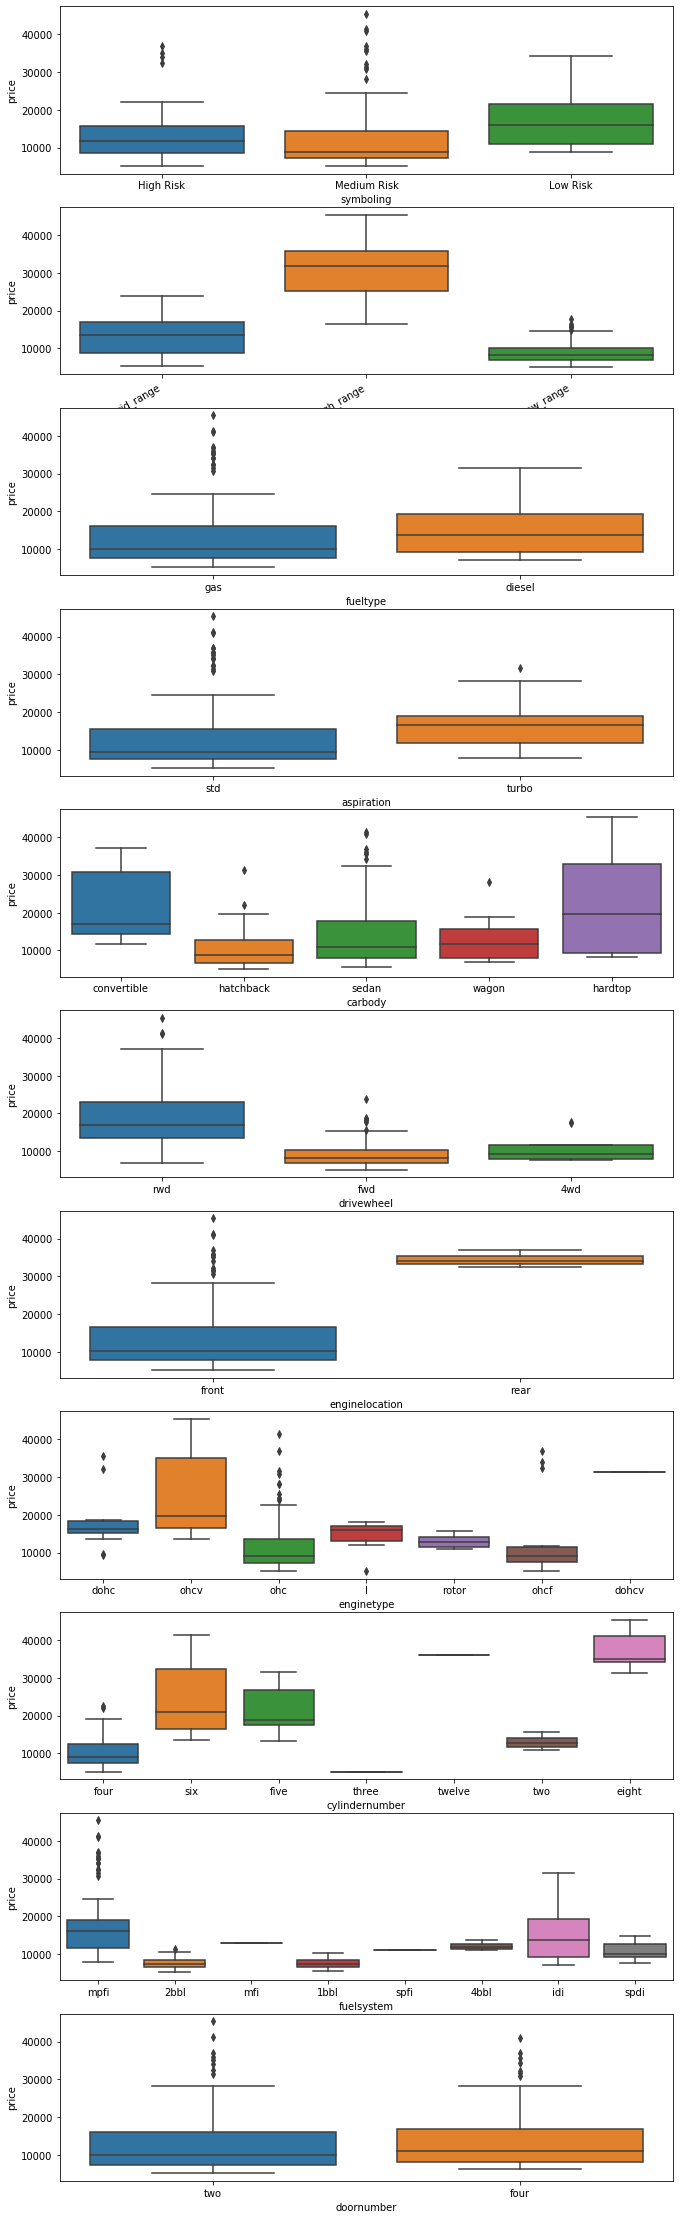

In [24]:
plt.figure(figsize=(11, 40))
plt.subplot(11,1,1)
sns.boxplot(x = 'symboling', y = 'price', data = car_pricing)
plt.subplot(11,1,2)
ax=sns.boxplot(x = 'CarCompany_Segment', y = 'price', data = car_pricing)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.subplot(11,1,3)
sns.boxplot(x = 'fueltype', y = 'price', data = car_pricing)
plt.subplot(11,1,4)
sns.boxplot(x = 'aspiration', y = 'price', data = car_pricing)
plt.subplot(11,1,5)
sns.boxplot(x = 'carbody', y = 'price', data = car_pricing)
plt.subplot(11,1,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_pricing)
plt.subplot(11,1,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_pricing)
plt.subplot(11,1,8)
sns.boxplot(x = 'enginetype', y = 'price', data = car_pricing)
plt.subplot(11,1,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_pricing)
plt.subplot(11,1,10)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_pricing)
plt.subplot(11,1,11)
sns.boxplot(x = 'doornumber', y = 'price', data = car_pricing)
plt.show()

## Step 3: Data Preparation

- You can see that your dataset has many columns categorical values having only 2 unique values.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s.

In [25]:
# Applying the data preparation steps to the car pricing dataset
car_pricing['fueltype'] = car_pricing['fueltype'].map({'gas': 1, 'diesel': 0})
car_pricing['aspiration'] = car_pricing['aspiration'].map({'std': 1, 'turbo': 0})
car_pricing['doornumber'] = car_pricing['doornumber'].map({'two': 1, 'four': 0})
car_pricing['enginelocation'] = car_pricing['enginelocation'].map({'front': 1, 'rear': 0})

In [26]:
# Check the car pricing dataframe now
car_pricing.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,CarCompany_Segment
0,High Risk,1,1,1,convertible,rwd,1,88.6,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0,mid_range
1,High Risk,1,1,1,convertible,rwd,1,88.6,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0,mid_range
2,Medium Risk,1,1,1,hatchback,rwd,1,94.5,171.2,52.4,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0,mid_range
3,High Risk,1,1,0,sedan,fwd,1,99.8,176.6,54.3,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0,mid_range
4,High Risk,1,1,0,sedan,4wd,1,99.4,176.6,54.3,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0,mid_range


### Dummy Variables

Now we will create dummy variab;es for the categorical variables in the dataframe

In [27]:
# Creating dummy variables in a dataframe df
df = pd.get_dummies(car_pricing, drop_first = True)

In [28]:
df.shape

(205, 44)

In [29]:
df.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,symboling_Low Risk,symboling_Medium Risk,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarCompany_Segment_low_range,CarCompany_Segment_mid_range
0,1,1,1,1,88.6,168.8,48.8,130,3.47,2.68,9.0,111,5000,21,13495.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,1,1,1,88.6,168.8,48.8,130,3.47,2.68,9.0,111,5000,21,16500.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,1,1,1,94.5,171.2,52.4,152,2.68,3.47,9.0,154,5000,19,16500.0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,1,1,0,1,99.8,176.6,54.3,109,3.19,3.40,10.0,102,5500,24,13950.0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,1,1,0,1,99.4,176.6,54.3,136,3.19,3.40,8.0,115,5500,18,17450.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [30]:
df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase', 'carlength', 'carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price', 'symboling_Low Risk', 'symboling_Medium Risk', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'CarCompany_Segment_low_range', 'CarCompany_Segment_mid_range'], dtype='object')

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [31]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
df_train.shape

(143, 44)

In [33]:
df_test.shape

(62, 44)

### Rescaling the Features 

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
# List of Categorical Variables
numerical_variables = list(car_pricing.columns[car_pricing.dtypes != 'object'])
numerical_variables

['fueltype',
 'aspiration',
 'doornumber',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carheight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'price']

In [37]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

df_train[numerical_variables] = scaler.fit_transform(df_train[numerical_variables])

In [38]:
df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,symboling_Low Risk,symboling_Medium Risk,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarCompany_Segment_low_range,CarCompany_Segment_mid_range
122,1.0,1.0,0.0,1.0,0.244828,0.426016,0.265487,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.068818,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
125,1.0,1.0,1.0,1.0,0.272414,0.452033,0.212389,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.466890,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
166,1.0,1.0,1.0,1.0,0.272414,0.448780,0.424779,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.122110,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,1.0,1.0,1.0,1.0,0.068966,0.450407,0.088496,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.314446,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
199,1.0,0.0,0.0,1.0,0.610345,0.775610,0.858407,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.382131,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [39]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,symboling_Low Risk,symboling_Medium Risk,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarCompany_Segment_low_range,CarCompany_Segment_mid_range
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000
mean,0.909091,0.818182,0.440559,0.993007,0.411141,0.525476,0.509004,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.219310,0.104895,0.650350,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.468531,0.412587
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.215378,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.215682,0.307495,0.478536,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.500763,0.494030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.399187,0.353982,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.067298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.341379,0.502439,0.522124,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.140343,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.669919,0.668142,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.313479,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [40]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building a linear model

In [41]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 11),
 ('aspiration', False, 10),
 ('doornumber', False, 23),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', False, 5),
 ('carheight', False, 16),
 ('enginesize', True, 1),
 ('boreratio', False, 3),
 ('stroke', True, 1),
 ('compressionratio', False, 12),
 ('horsepower', True, 1),
 ('peakrpm', False, 6),
 ('citympg', False, 13),
 ('symboling_Low Risk', False, 15),
 ('symboling_Medium Risk', False, 25),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 18),
 ('drivewheel_rwd', False, 20),
 ('enginetype_dohcv', False, 14),
 ('enginetype_l', False, 24),
 ('enginetype_ohc', False, 2),
 ('enginetype_ohcf', False, 7),
 ('enginetype_ohcv', False, 19),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', False, 27),
 ('cylindernumber_four', False, 8),
 ('cylindernumber_six', False, 17),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_twelve', Tr

In [44]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'enginesize', 'stroke', 'horsepower', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'enginetype_rotor', 'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two', 'CarCompany_Segment_low_range', 'CarCompany_Segment_mid_range'], dtype='object')

In [45]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'carlength', 'carheight', 'boreratio', 'compressionratio', 'peakrpm', 'citympg', 'symboling_Low Risk', 'symboling_Medium Risk', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [46]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Model 1

In [47]:
import statsmodels.api as sm

# Add a constant
X_train_1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm_1 = sm.OLS(y_train,X_train_1).fit()   

In [48]:
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     116.0
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.56e-65
Time:                        19:42:10   Log-Likelihood:                 204.04
No. Observations:                 143   AIC:                            -378.1
Df Residuals:                     128   BIC:                            -333.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [49]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,enginetype_rotor,inf
12,cylindernumber_two,inf
0,enginelocation,61.92
2,enginesize,32.10
7,carbody_sedan,19.89
3,stroke,17.37
6,carbody_hatchback,15.04
1,wheelbase,13.26
4,horsepower,12.67
13,CarCompany_Segment_low_range,11.26


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

In [51]:
#dropping stroke as its p-value is very high
X_dummy = X_train_rfe.drop(['stroke'],axis=1)

### Model 2

In [52]:
# Add a constant
X_train_2 = sm.add_constant(X_dummy)

# Create a first fitted model
lm_2 = sm.OLS(y_train,X_train_2).fit()   

In [53]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     125.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.37e-66
Time:                        19:42:11   Log-Likelihood:                 204.03
No. Observations:                 143   AIC:                            -380.1
Df Residuals:                     129   BIC:                            -338.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [54]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_dummy
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,enginetype_rotor,inf
11,cylindernumber_two,inf
0,enginelocation,60.79
2,enginesize,27.66
6,carbody_sedan,18.72
5,carbody_hatchback,13.83
1,wheelbase,13.20
3,horsepower,11.90
12,CarCompany_Segment_low_range,11.13
13,CarCompany_Segment_mid_range,8.00


In [55]:
#dropping cylindernumber_twelve as its p value is very high
X_dummy_1 = X_dummy.drop(['cylindernumber_twelve'],axis=1)

### Model 3

In [56]:
# Add a constant
X_train_3 = sm.add_constant(X_dummy_1)

# Create a first fitted model
lm_3 = sm.OLS(y_train,X_train_3).fit()  

In [57]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     135.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.78e-67
Time:                        19:42:12   Log-Likelihood:                 203.05
No. Observations:                 143   AIC:                            -380.1
Df Residuals:                     130   BIC:                            -341.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [58]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_dummy_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,enginetype_rotor,inf
10,cylindernumber_two,inf
0,enginelocation,59.16
2,enginesize,23.53
6,carbody_sedan,18.38
5,carbody_hatchback,13.72
1,wheelbase,11.80
3,horsepower,11.73
11,CarCompany_Segment_low_range,11.05
12,CarCompany_Segment_mid_range,7.95


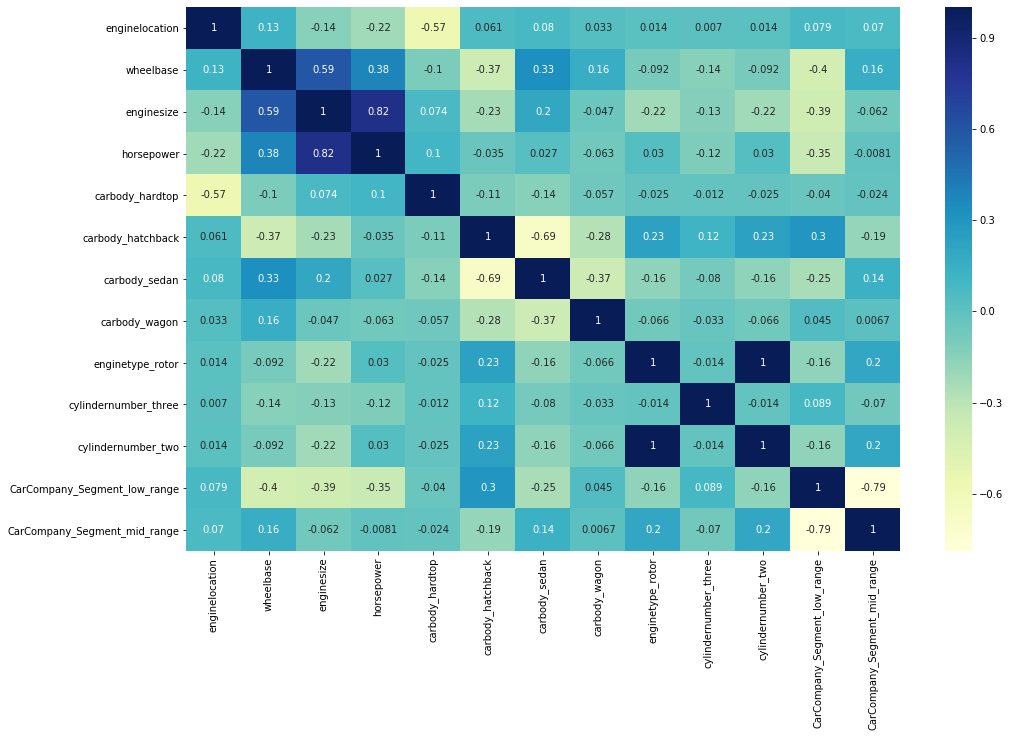

In [59]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_dummy_1.corr(), annot = True, cmap="YlGnBu")

# fix for mpl bug that cuts off top/bottom of seaborn
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

In [60]:
#dropping cylindernumber_three as its p value is more than 0.05
X_dummy_2 = X_dummy_1.drop(['cylindernumber_three'],axis=1)

### Model 4

In [61]:
# Add a constant
X_train_4 = sm.add_constant(X_dummy_2)

# Create a first fitted model
lm_4 = sm.OLS(y_train,X_train_4).fit()  

In [62]:
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     146.2
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.71e-68
Time:                        19:42:17   Log-Likelihood:                 201.83
No. Observations:                 143   AIC:                            -379.7
Df Residuals:                     131   BIC:                            -344.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [63]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_dummy_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,enginetype_rotor,inf
9,cylindernumber_two,inf
0,enginelocation,58.81
2,enginesize,23.48
6,carbody_sedan,18.37
5,carbody_hatchback,13.67
1,wheelbase,11.76
3,horsepower,11.73
10,CarCompany_Segment_low_range,10.99
11,CarCompany_Segment_mid_range,7.90


In [64]:
#dropping cylindernumber_two as its VIF is infinity
X_dummy_3 = X_dummy_2.drop(['cylindernumber_two'],axis=1)

### Model 5

In [65]:
# Add a constant
X_train_5 = sm.add_constant(X_dummy_3)

# Create a first fitted model
lm_5 = sm.OLS(y_train,X_train_5).fit() 

In [66]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     146.2
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.71e-68
Time:                        19:42:18   Log-Likelihood:                 201.83
No. Observations:                 143   AIC:                            -379.7
Df Residuals:                     131   BIC:                            -344.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [67]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_dummy_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,58.81
2,enginesize,23.48
6,carbody_sedan,18.37
5,carbody_hatchback,13.67
1,wheelbase,11.76
3,horsepower,11.73
9,CarCompany_Segment_low_range,10.99
10,CarCompany_Segment_mid_range,7.90
7,carbody_wagon,6.30
8,enginetype_rotor,1.44


In [68]:
#dropping enginelocation as its VIF is very high
X_dummy_4 = X_dummy_3.drop(['enginelocation'],axis=1)

### Model 6

In [69]:
# Add a constant
X_train_6 = sm.add_constant(X_dummy_4)

# Create a first fitted model
lm_6 = sm.OLS(y_train,X_train_6).fit() 

In [70]:
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     151.0
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.62e-67
Time:                        19:42:18   Log-Likelihood:                 197.20
No. Observations:                 143   AIC:                            -372.4
Df Residuals:                     132   BIC:                            -339.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [71]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_dummy_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,18.99
0,wheelbase,11.76
5,carbody_sedan,11.55
2,horsepower,11.39
4,carbody_hatchback,8.63
8,CarCompany_Segment_low_range,6.91
9,CarCompany_Segment_mid_range,4.63
6,carbody_wagon,4.47
7,enginetype_rotor,1.39
3,carbody_hardtop,1.35


In [72]:
#dropping carbody_hardtop as its p value is very high
X_dummy_5 = X_dummy_4.drop(['carbody_hardtop'],axis=1)

### Model 7

In [73]:
# Add a constant
X_train_7 = sm.add_constant(X_dummy_5)

# Create a first fitted model
lm_7 = sm.OLS(y_train,X_train_7).fit() 

In [74]:
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     164.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.29e-67
Time:                        19:42:19   Log-Likelihood:                 195.51
No. Observations:                 143   AIC:                            -371.0
Df Residuals:                     133   BIC:                            -341.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [75]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_dummy_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,18.71
0,wheelbase,11.69
2,horsepower,11.31
4,carbody_sedan,9.27
3,carbody_hatchback,6.88
7,CarCompany_Segment_low_range,5.65
8,CarCompany_Segment_mid_range,3.98
5,carbody_wagon,3.76
6,enginetype_rotor,1.39


In [76]:
#dropping enginesize as its VIF is very high
X_dummy_6 = X_dummy_5.drop(['enginesize'],axis=1)

In [77]:
# Add a constant
X_train_8 = sm.add_constant(X_dummy_6)

# Create a first fitted model
lm_8 = sm.OLS(y_train,X_train_8).fit() 

print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     177.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.12e-67
Time:                        19:42:19   Log-Likelihood:                 192.14
No. Observations:                 143   AIC:                            -366.3
Df Residuals:                     134   BIC:                            -339.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [78]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_dummy_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,carbody_sedan,9.19
0,wheelbase,8.65
2,carbody_hatchback,6.86
6,CarCompany_Segment_low_range,5.56
7,CarCompany_Segment_mid_range,3.84
4,carbody_wagon,3.76
1,horsepower,3.55
5,enginetype_rotor,1.18


In [79]:
#dropping cylindernumber_five as its p-value is very high
X_dummy_7 = X_dummy_6.drop(['enginetype_rotor'],axis=1)

### Model 9

In [80]:
# Add a constant
X_train_9 = sm.add_constant(X_dummy_7)

# Create a first fitted model
lm_9 = sm.OLS(y_train,X_train_9).fit() 

print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     201.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.02e-68
Time:                        19:42:20   Log-Likelihood:                 191.34
No. Observations:                 143   AIC:                            -366.7
Df Residuals:                     135   BIC:                            -343.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [81]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_dummy_7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,carbody_sedan,9.16
0,wheelbase,8.58
2,carbody_hatchback,6.61
5,CarCompany_Segment_low_range,5.49
6,CarCompany_Segment_mid_range,3.81
4,carbody_wagon,3.75
1,horsepower,3.55


In [82]:
#dropping carbody_sedan as its VIF is very high
X_dummy_8 = X_dummy_7.drop(['carbody_sedan'],axis=1)

### Model 10

In [83]:
# Add a constant
X_train_10 = sm.add_constant(X_dummy_8)

# Create a first fitted model
lm_10 = sm.OLS(y_train,X_train_10).fit() 

print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     213.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.17e-66
Time:                        19:42:21   Log-Likelihood:                 184.56
No. Observations:                 143   AIC:                            -355.1
Df Residuals:                     136   BIC:                            -334.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [84]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_dummy_8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,wheelbase,5.34
1,horsepower,3.45
4,CarCompany_Segment_low_range,2.55
5,CarCompany_Segment_mid_range,2.33
2,carbody_hatchback,2.01
3,carbody_wagon,1.32


In [85]:
#dropping cylindernumber_five as its p value is very high
X_dummy_9 = X_dummy_8.drop(['carbody_wagon'],axis=1)

### Model 11

In [86]:
# Add a constant
X_train_11 = sm.add_constant(X_dummy_9)

# Create a first fitted model
lm_11 = sm.OLS(y_train,X_train_11).fit() 

print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     254.2
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.83e-67
Time:                        19:42:21   Log-Likelihood:                 183.54
No. Observations:                 143   AIC:                            -355.1
Df Residuals:                     137   BIC:                            -337.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [87]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_dummy_9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,wheelbase,5.23
1,horsepower,3.45
3,CarCompany_Segment_low_range,2.38
4,CarCompany_Segment_mid_range,2.29
2,carbody_hatchback,1.86


In [88]:
#dropping carbody_hatchback as its p-value is higher than 0.05
X_dummy_10 = X_dummy_9.drop(['carbody_hatchback'],axis=1)

### Model 12

In [89]:
# Add a constant
X_train_12 = sm.add_constant(X_dummy_10)

# Create a first fitted model
lm_12 = sm.OLS(y_train,X_train_12).fit() 

print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     314.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.74e-68
Time:                        19:42:21   Log-Likelihood:                 182.45
No. Observations:                 143   AIC:                            -354.9
Df Residuals:                     138   BIC:                            -340.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [90]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_dummy_10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,wheelbase,4.80
1,horsepower,3.13
3,CarCompany_Segment_mid_range,2.07
2,CarCompany_Segment_low_range,1.62


## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [91]:
y_train_price = lm_12.predict(X_train_12)

Text(0.5, 0, 'Errors')

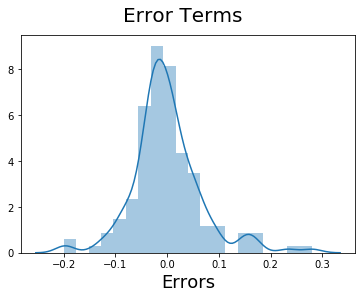

In [92]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Applying the scaling on the test sets

In [93]:
df_test[numerical_variables] = scaler.transform(df_test[numerical_variables])

In [94]:
df_test.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,symboling_Low Risk,symboling_Medium Risk,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarCompany_Segment_low_range,CarCompany_Segment_mid_range
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.887097,0.822581,0.435484,0.967742,0.437764,0.559481,0.559663,0.265673,0.556580,0.544314,0.209375,0.248858,0.393351,0.328405,0.239439,0.161290,0.451613,0.080645,0.338710,0.451613,0.096774,0.564516,0.419355,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129,0.451613,0.435484
std,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.215811,0.162820,0.228484,0.160738,0.273690,0.163376,0.192092,0.172009,0.233076,0.370801,0.501716,0.274512,0.477134,0.501716,0.298064,0.499868,0.497482,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000,0.501716,0.499868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.141593,0.067925,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.027778,0.007763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.313793,0.459350,0.384956,0.177358,0.404762,0.484848,0.093750,0.107292,0.265306,0.166667,0.092342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.387931,0.547967,0.588496,0.226415,0.563492,0.585859,0.125000,0.218750,0.346939,0.305556,0.158991,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.570690,0.719919,0.699115,0.316038,0.746032,0.641414,0.150000,0.295833,0.540816,0.444444,0.317243,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,1.061947,0.932075,0.888889,0.863636,1.000000,0.662500,1.000000,0.694444,1.112855,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [95]:
y_test = df_test.pop('price')
X_test = df_test

In [96]:
X_test_1= X_test[X_dummy_10.columns]

In [97]:
# Adding constant variable to test dataframe
X_test_1 = sm.add_constant(X_test_1)

In [98]:
# Making predictions using the fourth model

y_pred = lm_12.predict(X_test_1)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

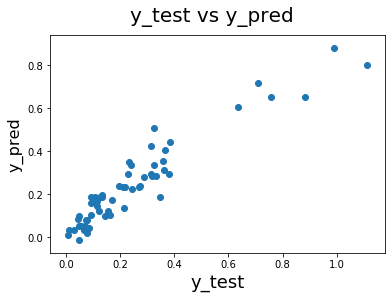

In [99]:
#### Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label    

Text(0.5, 0, 'Index')

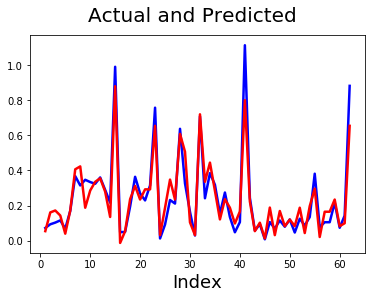

In [100]:
# Actual vs Predicted
c = [i for i in range(1,63,1)] # generating index
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)
plt.xlabel('Index', fontsize=18)

Text(0, 0.5, 'ytest-ypred')

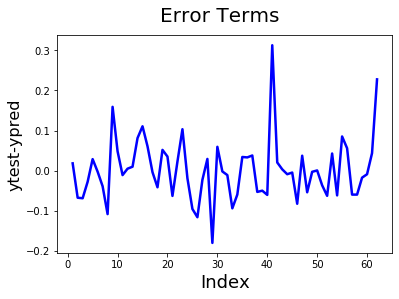

In [101]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('ytest-ypred', fontsize=16)

### Calculation of Model RMSE and R2 score

In [102]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.07759432859079324
Model r2_score: 0.8873511942515317


### We can see that Model r2_score: 0.89, Adj. R-squared as obtained from model 12 -  0.898 and  R-squared: 0.901 are quite similar. 
### This shows that the model is quite stable and is able to explain approx 90% variance of data. 
### Also the probablity of F-statistic is very low which adds to the confidence in goodness of model fit. 


Also the equation of our best fitted line is:

$ price = 0.2589  \times  wheelbase + 0.5704  \times  horsepower  -0.3295 \times CarCompanySegmentLowRnge -0.2728 \times CarCompanySegmentMidRange $


Overall we have a decent model.

Assumptions during model building:
1. The variable is considered insignificant if p-value > 0.05.
2. VIF > 5 is not considered good and such columns are dropped. 
3. Also the outliers hav not been removed as the data is very less (only 205 rows). This was also suggested during the live session. 
4. I have also segmented the car companies in low,high and mid range depending on their mean. Following cars come under then low range : "Chevrolet, dodge, Plymouth, honda, Subaru, isuzu, Mitsubishi, Renault, Toyota"   and mid range : "Volkswagen, Nissan, mazda, saab, Peugeot, alfa-romeo, mercury, audi, volvo"